In [1]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# LOADING THE DATA FROM THE DATASET.TXT

x1 = []
x2 = []
out = []

with open('dataset.txt','r') as data:
    temp = data.read().split('\n')
    temp = temp[:len(temp)-1]
    for i in range(len(temp)):
        a  = temp[i].split(',')
        x1.append(float(a[0]))
        x2.append(float(a[1]))
        out.append(int(a[2]))


In [3]:
# PREREQUISITES 

n = 2
m = len(out)
theta = np.zeros((n+1,1))

x1 = np.array(x1)
x2 = np.array(x2)
out = np.array(out)

X = np.zeros((m,n))
for i in range(len(X)):
    X[i][0]=x1[i]
    X[i][1]=x2[i]

In [16]:
# TRAINING THE LOGISTIC REGRESSION MODEL AND OBTAINING THE MODEL PARAMETERS
LogReg = LogisticRegression()
LogReg.fit(X,out)
theta[0] = LogReg.intercept_[0]
theta[1] = LogReg.coef_[0][0]
theta[2] = LogReg.coef_[0][1]

In [17]:
print(theta)

[[-25.05219314]
 [  0.20535491]
 [  0.2005838 ]]


In [18]:
# RANGE FOR THE PLOTING DECISION BOUNDRY
xvals = [i for i in range(int(np.min(x1))-1,int(np.max(x1))+1)]
yvals = [-(theta[0]+theta[1]*i)/theta[2] for i in xvals]

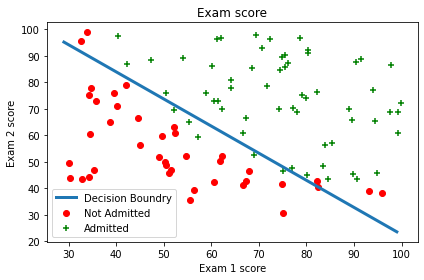

In [19]:
# PLOTTING THE DECISION BOUNDRY AND PLOTTING THE DATA

M = ['o','+']
C = ['red','green']

fig = plt.figure(1)
cnt = 0
for i in range(len(x1)):
    if out[i]==0:
        plt.scatter(x1[i],x2[i],label='Not Admitted' if cnt==0 else '',color=C[0],marker=M[0])
        cnt+=1

cnt = 0
for i in range(len(x1)):
    if out[i]==1:
        plt.scatter(x1[i],x2[i],label='Admitted' if cnt==0 else '',color=C[1],marker=M[1])
        cnt+=1


plt.plot(xvals,yvals,label='Decision Boundry',linewidth=3)
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.title('Exam score')
plt.legend()
plt.tight_layout()
plt.show()


In [25]:
# PREDICTING SIMPLE RESULTS


marks1 = np.array([[45,20]])
res = LogReg.predict(marks1)
if res[0]==1:
    print('Student 1 will be admitted in University')
else:
    print('Student 1 will not be admitted in University')
    

marks2 = np.array([[90,87]])
res = LogReg.predict(marks2)
if res[0]==1:
    print('Student 2 will be admitted in University')
else:
    print('Student 2 will not be admitted in University')


Student 1 will not be admitted in University
Student 2 will be admitted in University
